In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score
from IPython.core.display import display, HTML
%matplotlib inline

In [68]:
def plot_bar_x():
    #cf = [[802, 224], [ 99, 281]]
    cf = [[814, 212], [ 105, 275]]
    #cf = [[678, 348], [64, 316]]
    x = [0,1]
    correct = (cf[0][0], cf[1][1])
    incorrect = (cf[0][1], cf[1][0])
    ind = np.arange(len(x))
    
    p1 = plt.bar(ind, correct, alpha = .4)
    p2 = plt.bar(ind, incorrect, bottom=correct, alpha = .6)
    
    labels = ['Retained', 'Terminated']
    plt.xticks(x, labels)
    plt.legend((p1[0], p2[0]), ('Correct', 'Incorrect'))
    plt.show()

In [72]:
data = pd.read_csv('churn_with_preds.csv')

In [73]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'predictions'], dtype=object)

In [74]:
df = data[['customerID', 'gender', 'SeniorCitizen', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'predictions']].copy()

In [75]:
#All Customers
display(HTML('<h1>All Customers</h1>'))
df.head(10)

,customerID,gender,SeniorCitizen,Dependents,tenure,Contract,PaperlessBilling,predictions
0,2320-JRSDE,Female,0,Yes,1,Month-to-month,Yes,1
1,2087-QAREY,Female,0,No,22,Month-to-month,Yes,0
2,0601-WZHJF,Male,0,No,14,Month-to-month,No,1
3,4423-JWZJN,Male,0,Yes,64,One year,No,0
4,5143-WMWOG,Male,0,No,1,Month-to-month,No,0
5,6490-FGZAT,Male,0,No,6,Month-to-month,No,0
6,5393-RXQSZ,Male,0,No,1,Month-to-month,No,1
7,7452-FOLON,Male,0,Yes,39,One year,No,0
8,2320-TZRRH,Female,0,No,20,One year,No,0
9,0231-LXVAP,Male,0,No,1,Month-to-month,Yes,1


In [76]:
#Churn Only Customers
display(HTML('<h1>Churn Customers</h1>'))
df.query('predictions == 1').head(10)

,customerID,gender,SeniorCitizen,Dependents,tenure,Contract,PaperlessBilling,predictions
0,2320-JRSDE,Female,0,Yes,1,Month-to-month,Yes,1
2,0601-WZHJF,Male,0,No,14,Month-to-month,No,1
6,5393-RXQSZ,Male,0,No,1,Month-to-month,No,1
9,0231-LXVAP,Male,0,No,1,Month-to-month,Yes,1
10,9444-JTXHZ,Male,0,No,1,Month-to-month,No,1
17,4471-KXAUH,Female,0,No,42,Month-to-month,Yes,1
18,9752-ZNQUT,Female,0,No,1,Month-to-month,Yes,1
19,7638-QVMVY,Female,0,No,7,Month-to-month,Yes,1
22,7312-XSBAT,Male,0,No,1,Month-to-month,No,1
23,3096-GKWEB,Male,0,No,18,Month-to-month,Yes,1


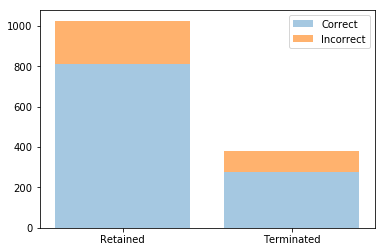

In [77]:
display(HTML('<h1>Customers Correctly Predicted</h1>'))
plot_bar_x();